
<div style="width: 100%; max-width: 100%; background-color: #f0f0f0; border: 2px solid #333; border-radius: 10px; padding: 20px; font-family: Arial, sans-serif; box-sizing: border-box;">
  <h2 style="color: #18453B; text-align: center;">Week 06: In Class Assignment<br>Imputation of the Planets Dataset</h2>
  
  <p style="color: #34495e; line-height: 1.6;">
    This ICA is one that requires both careful timing and has a presentation at the end. This would be a good time to read the notebook below entirely and make a plan! Let's try to have all of us out of here by 9:45! 
  </p>
  
  <div style="background-color: #6FC276; color: white; padding: 10px; margin-top: 20px; text-align: center; border-radius: 5px;">
    <strong>Tip:</strong> Plan carefully!
  </div>
</div>

# Names

Toaz, Benjamin Ryan;  Ni, Zhiqiang; Cho, Jungbum; Anandan, Gagan; Rathi, Rohan; Gobburi, Vishnu Vardhan;

===================================================

Your group will impute the planets dataset using one method and you will work together as a team to conclude with a presentation to two other groups. Note that today there are $9$ groups. 

which imputation method will you use? You will decide on the method for your group using this pattern:

<font color="#18953B">

{KNN, regression, MICE, KNN, regression, MICE, KNN, regression, MICE} [match method with next pattern]

{1, 2, 3, 4, 5, 6, 7, 8, 9} [match group with previous pattern]

{{1, 2, 3}, {4, 5, 6}, {7, 8, 9}} [which groups present to each other]
</font>

The general instructions are:
* learn the method assigned to your group very well
* apply the method to the planets dataset
* study and optimize the method to get the best results you can
* write a lecture on everything you did and learned that will take $6-8$ minutes to deliver on your white board
    - you might fill out the whiteboard as you work
* get some markers and present your lecture to the other two groups in your subset: all groups learn all three methods
* rotate through the three groups in your subset
* summarize your findings in a markdown cell

How much time will this take? We have $80$ minutes and the presentations will take $18-24$ minutes. Where will you put the remaining $50$? About $10$ minutes will be used for reading this and making a plan with your group. Writing the lecture is about $10$ minutes if you save it for the end. That leaves $30$ minutes to learn, run and optimize your method. I have given you helper code to get you started as quickly as possible. 


<div style="width: 100%; max-width: 100%; background-color: #fefefe; border: 1px solid #333; border-radius: 10px; padding: 20px; font-family: Arial, sans-serif; box-sizing: border-box;">
  <h3 style="color: #2c3e50; text-align: center;">K Nearest Neighbors</h2>
  
  <p style="color: #34495e; line-height: 1.6;">
    You are Team KNN. 
  </p>
</div>

Congratulations on being selected for Team KNN! This is the best of the three teams! Congrats, your method will be the best of the three. 

Your tasks are very simple:
* write a Python code to read in the planets dataset
* impute the missing values with a KNN library
* [learn about the library](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html); teach this to the other two groups later
* write a lecture on your whiteboard (recommended to do this as you work)
* give the lecture to two other groups (at the same time), starting around 9:20
* listen to their lectures
* summarize your comparisons among the three methods; what are the pros and cons of each method?

Here is some helper code to get you started; change/fix it as needed. Be sure to involve all of your group members in this effort! You might assign group members to:
* write the lecture on KNN
* gather information for the summary you will write and putting your group members names in the one notebook you will upload
* dig through [the docs](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html) to understand all of the options of this library (`weights`? `metric`? `n_neighbors`?)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
planets = sns.load_dataset('planets')

# Display basic information about the dataset
print(planets.info())

# Create a heatmap to visualize missing values
plt.figure(figsize=(8, 4))
sns.heatmap(planets.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Values in Planets Dataset')
plt.tight_layout()
plt.show()

# select numeric columns for imputation
numeric_columns = planets.select_dtypes(include=[np.number]).columns
planets_numeric = planets[numeric_columns]

# split the data into a set with missing values and a set without
planets_with_missing = planets_numeric[planets_numeric.isnull().any(axis=1)]
planets_without_missing = planets_numeric.dropna()

# prepare the data for KNN imputation
scaler = StandardScaler()
planets_scaled = pd.DataFrame(scaler.fit_transform(planets_without_missing), columns=planets_without_missing.columns)

# initialize and fit KNN imputer
imputer = KNNImputer(n_neighbors=5)
imputer.fit(planets_scaled)

# function to impute and inverse transform the data
def impute_and_inverse_transform(data):
    # Ensure 'data' is always a DataFrame with proper column names
    scaled_data = pd.DataFrame(scaler.transform(data), columns=data.columns, index=data.index)
    imputed_scaled = imputer.transform(scaled_data)
    return pd.DataFrame(scaler.inverse_transform(imputed_scaled), columns=data.columns, index=data.index)

# impute missing values
planets_imputed = impute_and_inverse_transform(planets_numeric)

# compare original and imputed data for a specific column (e.g., 'mass')
plt.figure(figsize=(8, 4))
sns.histplot(planets_numeric['mass'].dropna(), kde=True, color='blue', alpha=0.5, label='Original (non-missing)')
sns.histplot(planets_imputed.loc[planets_numeric['mass'].isnull(), 'mass'], kde=True, color='red', alpha=0.5, label='Imputed')
plt.title('Distribution of Original vs Imputed Mass')
plt.legend()
plt.show()

# print some statistics
print("\nOriginal data statistics:")
print(planets_numeric['mass'].describe())
print("\nImputed data statistics:")
print(planets_imputed['mass'].describe())


<div style="width: 100%; max-width: 100%; background-color: #fefefe; border: 1px solid #333; border-radius: 10px; padding: 20px; font-family: Arial, sans-serif; box-sizing: border-box;">
  <h3 style="color: #2c3e50; text-align: center;">Stochastic Regression</h2>
  
  <p style="color: #34495e; line-height: 1.6;">
    You are Team Stochastic Regression. 
  </p>
  
  <!-- <div style="background-color: #6FC276; color: white; padding: 10px; margin-top: 20px; text-align: center; border-radius: 5px;">
    <strong>Tip:</strong> Plan carefully!
  </div> -->
</div>

Congratulations on being selected for Team Stochastic Regression! This is the best of the three teams! Congrats, your method will be the best of the three. 

Your tasks are very simple:
* write a Python code to read in the planets dataset
* impute the missing values with stochastic regression
* as you work, write a lecture on your whiteboard so that you can show two other groups what you learned
* luckily for you, we covered this in class and you took extremely careful notes! unfortunately, there isn't a library (that I know of) for this method
* present your findings to the other two groups starting at 9:20

Here is some helper code to get you started. Be sure to involve all of your group members in this effort! You might assign:
* people writing the lecture on stochastic regression
* people gathering information for the summary you will write and putting your group members names in the one notebook you will upload
* assign a viz person or two: what plots do you want? correlation heatmaps?
* writing the code, making visualizations, varying parameters, iterating

I have a little code here to help Team Stochastic Regression get started! Feel free to start from scratch or modify in any way; you might not like what my version does! 

In [ ]:
import seaborn as sns
import pandas as pd

# Load the planets dataset
planets = sns.load_dataset('planets')

# Explore the dataset
display(planets.info())
planets.describe()

Look at the first row: `count`. We need a clean version of this so that we can perform the regression. Let's make that now.

In [ ]:
# here is where it makes sense to use dropna()!
planets_clean = planets.dropna()

Let's see what we got:

In [ ]:
planets_clean.describe()

With the clean dataset, we need to fit a line. We choose a line because we don't want to overfit. 

Here we do linear regression using three variables, one dependent and two independent; we are really fitting to a _plane_. This might be unusual for some of you, and we will cover it once we have done linear algebra. This is called **Multiple Linear Regression** and is extremely common in data science and machine learning; much more later in the semester on this......


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# define predictors and target
X = planets_clean[['mass', 'distance']]
y = planets_clean['orbital_period']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fit a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# predict on the test set
y_pred = linear_model.predict(X_test)

If this were all we did, we would have a good relationship to predict `orbital_period` from _two_ of the other columns: `mass` and `distance`. (We would have done a lot of EDA first to choose which features to use.) We could impute now using this "line", which is really a plane, but we need the stochastic part. Consider making a 3D scatter plot, [perhaps using Plotly](https://plotly.com/python/3d-scatter-plots/), that shows this relationship. 

Make sure you understand this code.

In [ ]:
# Calculate residuals from the training set
residuals = y_train - linear_model.predict(X_train)

# Estimate the standard deviation of the residuals
residual_std = np.std(residuals)

# Generate predictions using the original linear model
y_pred = linear_model.predict(X_test)

# Number of stochastic simulations
n_simulations = 100
stochastic_predictions = []

for i in range(n_simulations):
    # Add noise to the final predictions (assuming noise in the outcome)
    noise = np.random.normal(0, residual_std, size=y_pred.shape)  # residual_std from previous calculation
    stochastic_predictions.append(y_pred + noise)

# Convert to numpy array
stochastic_predictions = np.array(stochastic_predictions)

Let's see what we got. 

In [ ]:
import matplotlib.pyplot as plt

# Plot stochastic predictions
plt.figure(figsize=(10, 6))

# Plot actual values
plt.scatter(range(len(y_test)), y_test, color='black', label='Actual')

# Plot stochastic predictions as a shaded region
plt.fill_between(range(len(y_test)), stochastic_predictions.min(axis=0), stochastic_predictions.max(axis=0),
                 color='blue', alpha=0.2, label='Stochastic Prediction Range')

plt.legend()
plt.title('Stochastic Regression: Orbital Period Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Orbital Period')
plt.show()

Now, you try some ideas. Try some other columns, or different combinations of columns. Consider making some heatmaps with correlations. 

Be sure to write a summary of the three methods and what you learned by comparing them.


<div style="width: 100%; max-width: 100%; background-color: #fefefe; border: 1px solid #333; border-radius: 10px; padding: 20px; font-family: Arial, sans-serif; box-sizing: border-box;">
  <h3 style="color: #2c3e50; text-align: center;">MICE</h2>
  
  <p style="color: #34495e; line-height: 1.6;">
    You are Team MICE. 
  </p>
  
  <!-- <div style="background-color: #6FC276; color: white; padding: 10px; margin-top: 20px; text-align: center; border-radius: 5px;">
    <strong>Tip:</strong> Plan carefully!
  </div> -->
</div>

Congratulations on being selected for Team MICE! This is the best of the three teams! Congrats, your method will be the best of the three. 

Your tasks are very simple:
* write a Python code to read in the planets dataset
* impute the missing values with a MICE library
* learn about the method and library
* prepare a lecture for the other two groups in your subset of three groups

Here is some helper code to get you started. Be sure to involve all of your group members in this effort! You might assign:
* people writing the lecture on MICE
* viz people
* people gathering information for the summary you will write and putting your group members names in the one notebook you will upload
* people digging through [the docs](


We didn't cover MICE in the lecture. Here are some more details for you to learn and teach to the other two groups. You might have someone in your group summarize this on your whiteboard.

_______

#### MICE (Multivariate Imputation by Chained Equations) Summary

MICE is an iterative imputation method that imputes missing values in a dataset by using a separate model for each variable with missing values. It can handle different variable types and complex missing data patterns.

##### Algorithm Steps:

1. Perform a simple imputation (e.g., mean) for all missing values to create a complete dataset. This generates a dataset that you can fit to.
2. For each variable with missing values ($X_i$): (this means you are now looking at each column $i$ separately)
   - Set the imputed values of $X_i$ back to missing. (only for this column $i$, leaving imputed values in the remaining columns)
   - Regress (fit) $X_i$ on all other variables. (you fit the observed targets in column $i$ to all other columns, which are all imputed)
   - Impute the missing values of $X_i$ using the regression model. (use the resulting fit to impute column $i$); you might draw a nice diagram to explain this!
3. Repeat step 2 for a specified number of cycles (usually 10-20). (that is, work through the other columns using the new result for $i$ and repeat toward convergence - this is what "chained equations" means)
4. Repeat steps 1-3 multiple times to generate multiple imputed datasets. (this is when there is a stochastic element and gives an uncertainty estimate)
5. Analyze each imputed dataset separately.
6. Combine the results.

This process allows for the preservation of relationships between variables and accounts for uncertainty in the imputed values through multiple imputations.

___________



Implement MICE for the planets dataset, be sure you understand the results and teach this to the other two groups. Compare with the methods they are using and write a summary. 

MICE Imputation Results:
Mean Squared Error (log scale): 5.9051
R2 Score: 0.1690

Mean Imputation Results:
Mean Squared Error (log scale): 5.7048
R2 Score: 0.1972


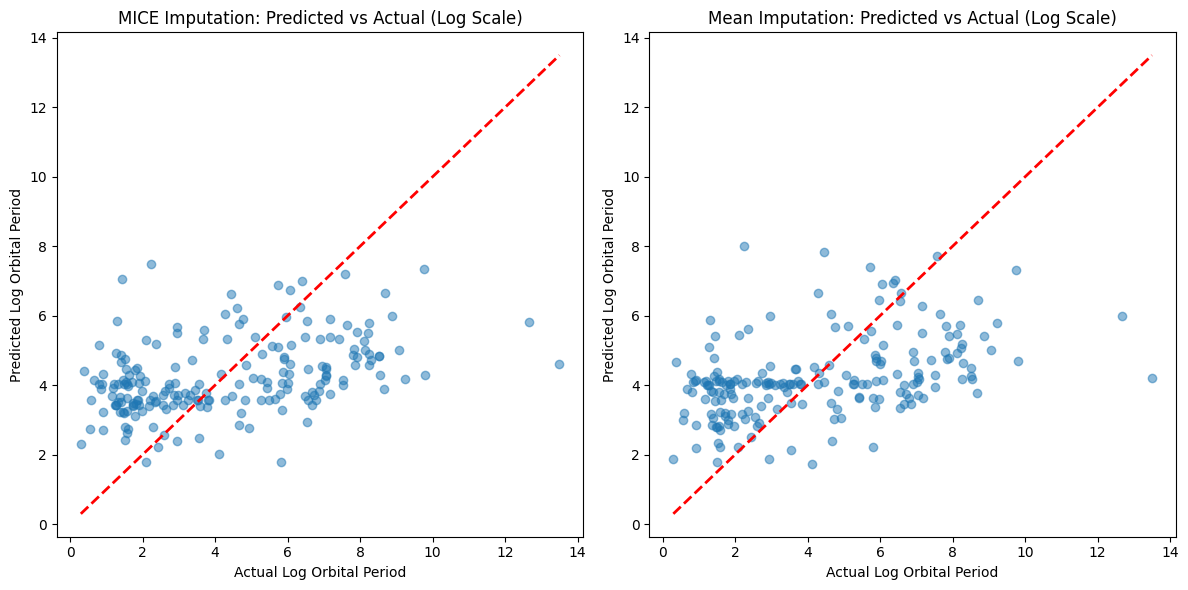


Feature Importances (MICE):
        feature  importance
2  log_distance    2.141101
1      log_mass    1.680043
3          year    0.106578
0        number    0.000827

Feature Importances (Mean):
        feature  importance
1      log_mass    1.929565
2  log_distance    1.416607
3          year    0.136910
0        number    0.012992

Exponentiated MSE (MICE): 366.8932
Exponentiated MSE (Mean): 300.3098


In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # this could be any ML method
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler
import matplotlib.pyplot as plt

# Load the planets dataset
planets = sns.load_dataset('planets')

# Select columns for analysis
columns_to_use = ['number', 'orbital_period', 'mass', 'distance', 'year']
data = planets[columns_to_use].copy()

# Replace infinite values with NaN
data = data.replace([np.inf, -np.inf], np.nan)

# Remove rows where orbital_period (our target) is NaN
data = data.dropna(subset=['orbital_period'])

# Log transform the target variable and relevant features
data['log_orbital_period'] = np.log1p(data['orbital_period'])
data['log_mass'] = np.log1p(data['mass'])
data['log_distance'] = np.log1p(data['distance'])

# Split features and target
X = data[['number', 'log_mass', 'log_distance', 'year']]
y = data['log_orbital_period']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use RobustScaler instead of StandardScaler
scaler = RobustScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

# Perform MICE imputation
mice_imputer = IterativeImputer(random_state=42, max_iter=50)
X_train_mice = pd.DataFrame(mice_imputer.fit_transform(X_train_scaled), 
                            columns=X_train.columns, index=X_train.index)
X_test_mice = pd.DataFrame(mice_imputer.transform(X_test_scaled), 
                           columns=X_test.columns, index=X_test.index)

# Train a linear regression model on the MICE imputed data
lr_mice = LinearRegression()
lr_mice.fit(X_train_mice, y_train)

# Make predictions and calculate MSE and R2
y_pred_mice = lr_mice.predict(X_test_mice)
mse_mice = mean_squared_error(y_test, y_pred_mice)
r2_mice = r2_score(y_test, y_pred_mice)

print(f"MICE Imputation Results:")
print(f"Mean Squared Error (log scale): {mse_mice:.4f}")
print(f"R2 Score: {r2_mice:.4f}")

# Compare with simple mean imputation
mean_imputer = SimpleImputer(strategy='mean')
X_train_mean = pd.DataFrame(mean_imputer.fit_transform(X_train_scaled), 
                            columns=X_train.columns, index=X_train.index)
X_test_mean = pd.DataFrame(mean_imputer.transform(X_test_scaled), 
                           columns=X_test.columns, index=X_test.index)

lr_mean = LinearRegression()
lr_mean.fit(X_train_mean, y_train)
y_pred_mean = lr_mean.predict(X_test_mean)
mse_mean = mean_squared_error(y_test, y_pred_mean)
r2_mean = r2_score(y_test, y_pred_mean)

print(f"\nMean Imputation Results:")
print(f"Mean Squared Error (log scale): {mse_mean:.4f}")
print(f"R2 Score: {r2_mean:.4f}")

# Visualize the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_mice, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Log Orbital Period')
plt.ylabel('Predicted Log Orbital Period')
plt.title('MICE Imputation: Predicted vs Actual (Log Scale)')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_mean, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Log Orbital Period')
plt.ylabel('Predicted Log Orbital Period')
plt.title('Mean Imputation: Predicted vs Actual (Log Scale)')

plt.tight_layout()
plt.show()

# Print feature importances (coefficients for linear regression)
feature_importance_mice = pd.DataFrame({'feature': X_train.columns, 'importance': np.abs(lr_mice.coef_)})
feature_importance_mice = feature_importance_mice.sort_values('importance', ascending=False)
print("\nFeature Importances (MICE):")
print(feature_importance_mice)

feature_importance_mean = pd.DataFrame({'feature': X_train.columns, 'importance': np.abs(lr_mean.coef_)})
feature_importance_mean = feature_importance_mean.sort_values('importance', ascending=False)
print("\nFeature Importances (Mean):")
print(feature_importance_mean)

# Calculate and print exponentiated MSE for interpretability
print(f"\nExponentiated MSE (MICE): {np.exp(mse_mice):.4f}")
print(f"Exponentiated MSE (Mean): {np.exp(mse_mean):.4f}")

Think through what this result tells you. MICE uses correlations in the dataset and is generally more powerful than something simple like mean imputation. In this code we see that these two methods are comparable. This result suggests that there are very weak correlations in this dataset.

We can explore this hypothesis by examining correlations among the variables in this dataset. (We would have done this in an earlier EDA step in a more realistic workflow.)

<Figure size 1200x1000 with 0 Axes>

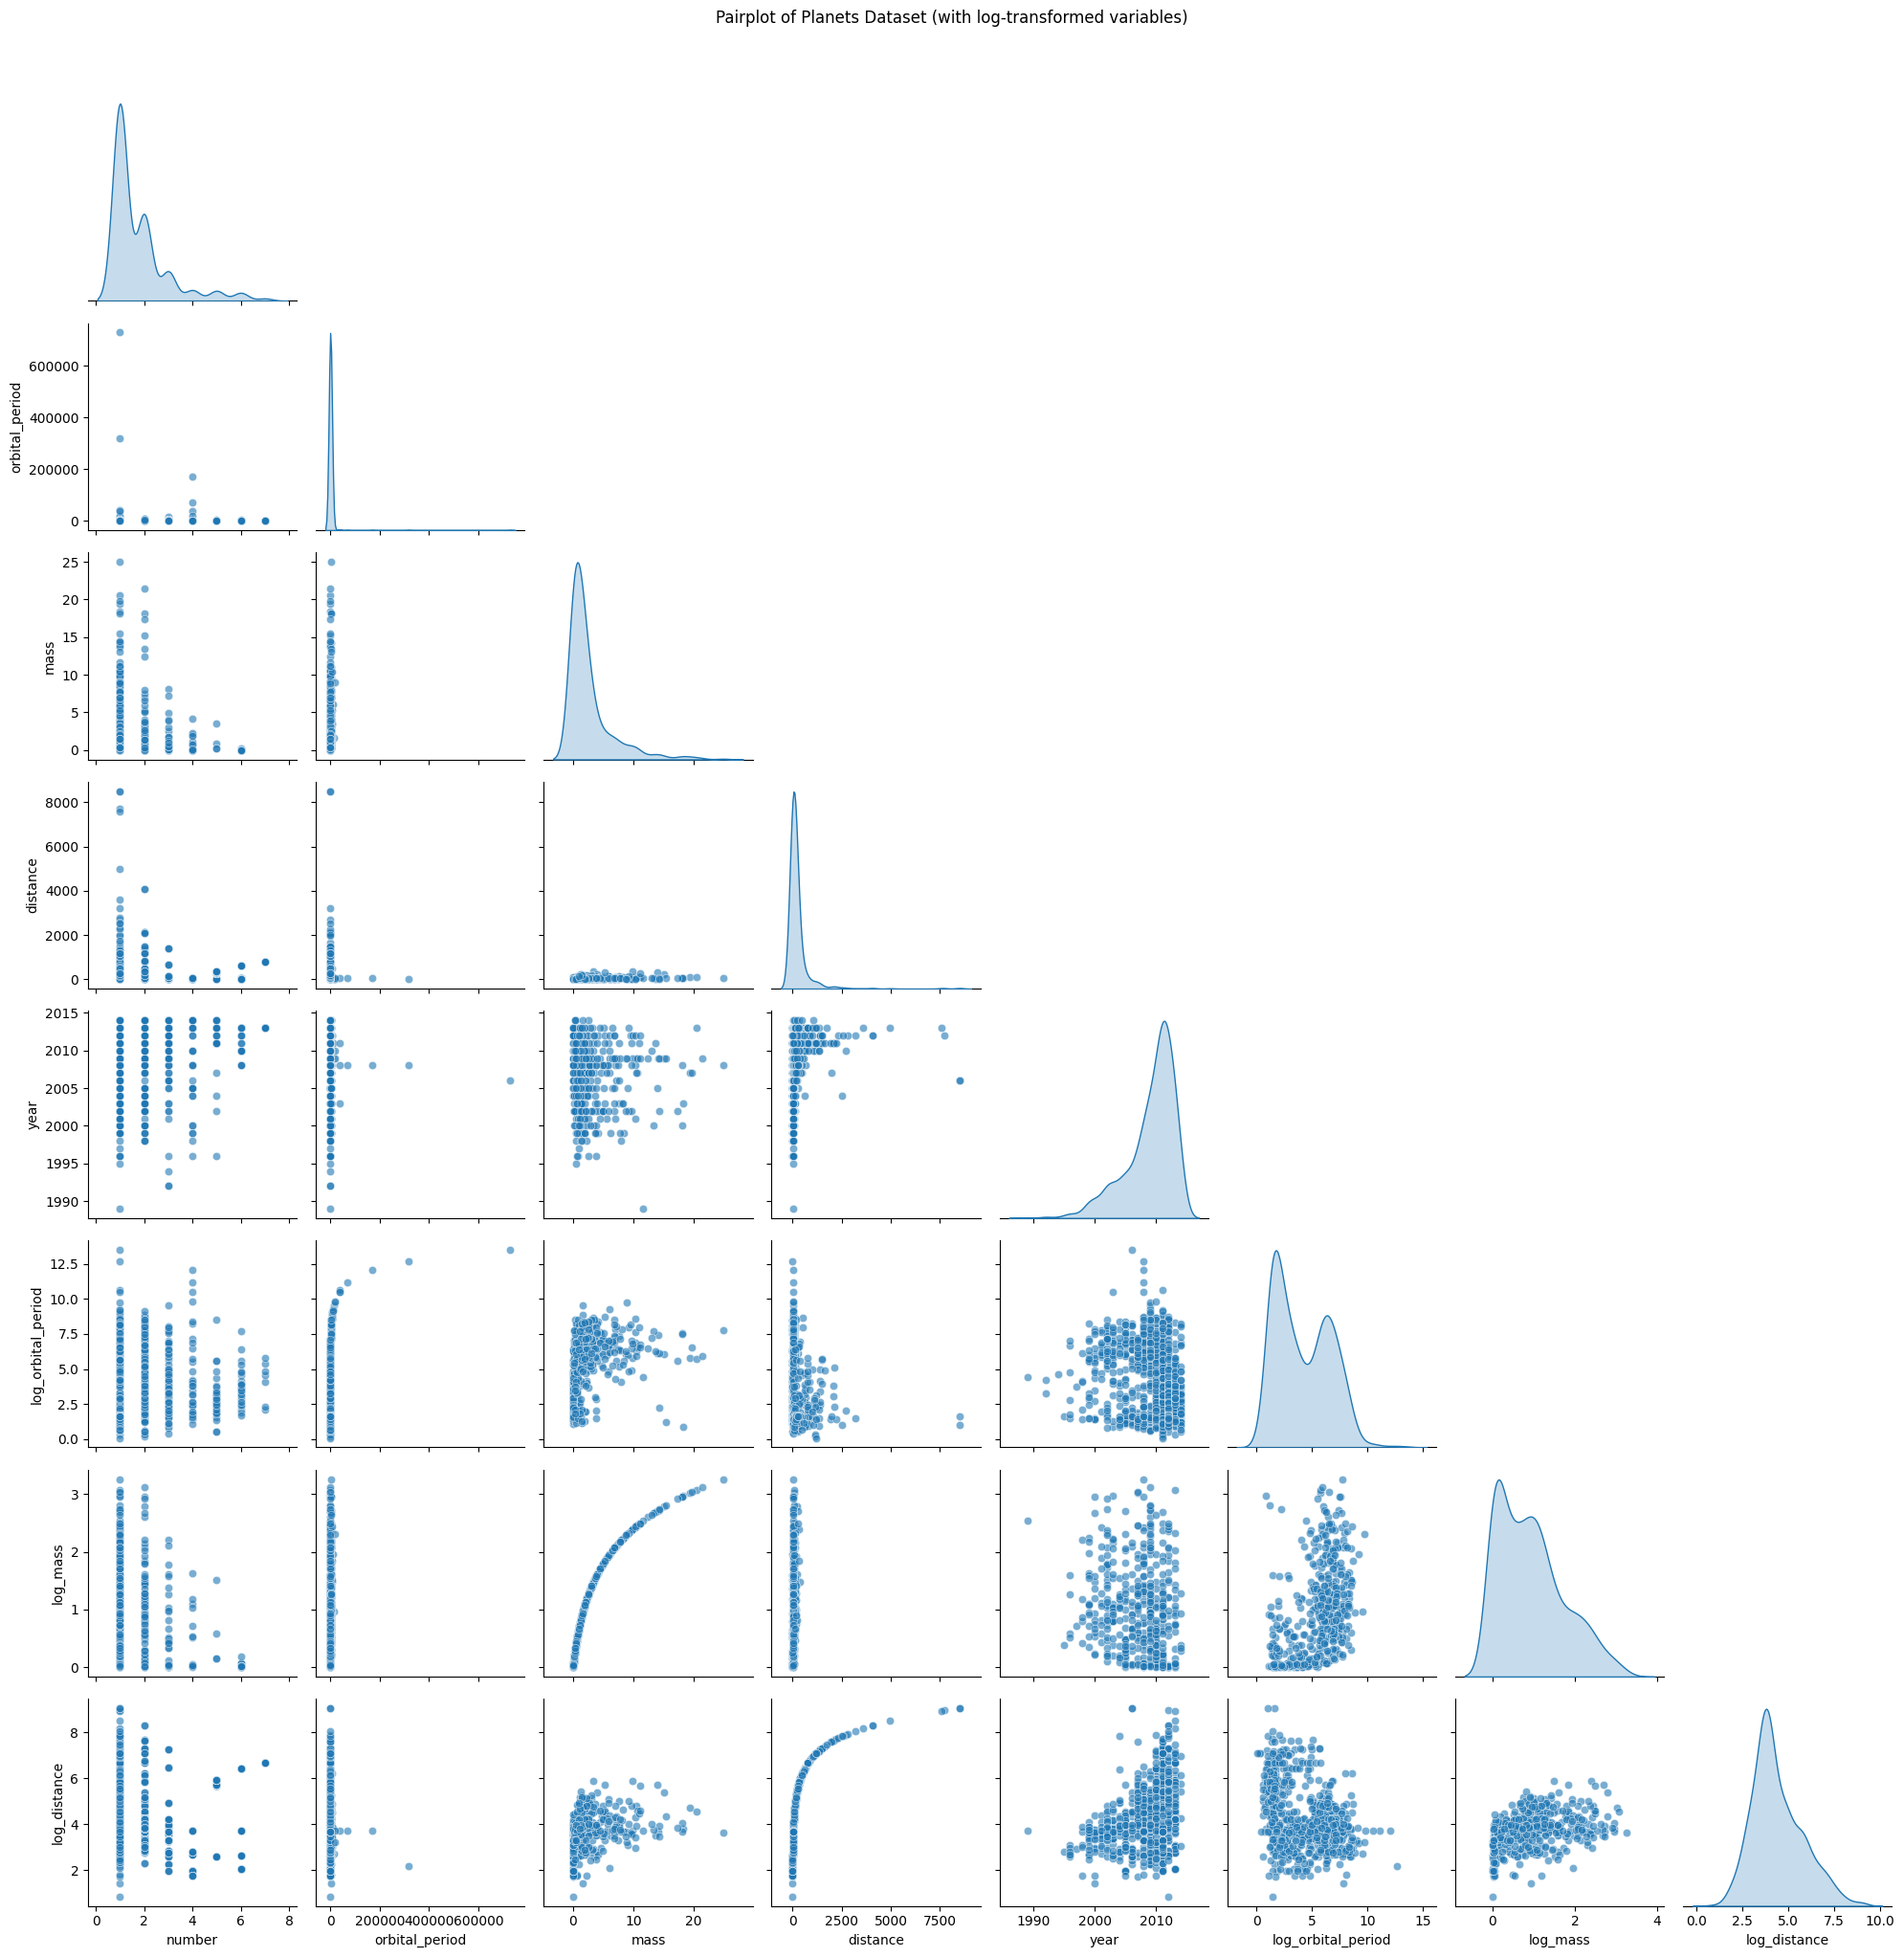

Correlation Matrix:
                      number  orbital_period      mass  distance      year  \
number              1.000000       -0.012570 -0.241429 -0.033638  0.147849   
orbital_period     -0.012570        1.000000  0.173725 -0.034365 -0.032333   
mass               -0.241429        0.173725  1.000000  0.274082 -0.123787   
distance           -0.033638       -0.034365  0.274082  1.000000  0.178922   
year                0.147849       -0.032333 -0.123787  0.178922  1.000000   
log_orbital_period -0.042199        0.223902  0.304351 -0.252720 -0.210154   
log_mass           -0.356603        0.273820  0.903533  0.366903 -0.207469   
log_distance       -0.109091       -0.087276  0.294322  0.648296  0.372921   

                    log_orbital_period  log_mass  log_distance  
number                       -0.042199 -0.356603     -0.109091  
orbital_period                0.223902  0.273820     -0.087276  
mass                          0.304351  0.903533      0.294322  
distance         

In [11]:
data = planets[columns_to_use].copy()

# Replace infinite values with NaN
data = data.replace([np.inf, -np.inf], np.nan)

# Create log-transformed versions of columns with wide ranges
data['log_orbital_period'] = np.log1p(data['orbital_period'])
data['log_mass'] = np.log1p(data['mass'])
data['log_distance'] = np.log1p(data['distance'])

# Create the pairplot
plt.figure(figsize=(12, 10))
sns.pairplot(data, corner=True, diag_kind="kde", plot_kws={'alpha': 0.6})
plt.suptitle("Pairplot of Planets Dataset (with log-transformed variables)", y=1.02)
plt.tight_layout()
plt.show()

# Calculate and print the correlation matrix
corr_matrix = data.corr()
print("Correlation Matrix:")
print(corr_matrix)

# Identify strong correlations
strong_correlations = (corr_matrix.abs() > 0.5) & (corr_matrix != 1.000)
strong_corr_pairs = [(corr_matrix.index[i], corr_matrix.columns[j], corr_matrix.iloc[i, j])
                     for i in range(len(corr_matrix.index))
                     for j in range(i+1, len(corr_matrix.columns))
                     if strong_correlations.iloc[i, j]]

print("\nStrong Correlations (|r| > 0.5):")
for pair in strong_corr_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]:.3f}")

Note that the only strong correlations in this dataset are between variables and transforms of those same variables. It could be that there are variables we do not have that are more important, and those could be correlated to the missing values; _if_ this is the case it would suggest, but not prove, that this dataset is MNAR. 

The planets dataset is truly a challenge! 



# Presentation Summary

KNN - Scale the datset, then use observations with closest feature values to incomplete observations to fill in missing vlaues. Can control the distance in the hyperspace and the number of similar points to use. Can also control the amount to weight each neightbor, either uniform or taking closer observations as more important. Tuning these weights can reduce the number of predicted outliers, but could overfit.


Stochastic regression - Find the line of best fit, locate the missing points around that line based on the present features, then add gaussian noise. Synthetic noise added in multiple dimensions in order to predict the missing values without overfitting to the existing data. For the dataset in the log transform, it adds complexity to what would be a very simple set of relationships (too simple).

MICE - Fill in values with mean imputation, then repeatedly train models to predict the missing entries using the previous imputed dataset. Repeat until convergence, where the predictions stabalize to the same values. In this case the feature relationships were not strong enough for the model to outperforn the mean imputation method. 

---

## Congratulations, you’re done!

Submit this assignment by uploading it to the course Desire2Learn web page. Go to the “In-class assignments” folder, find the appropriate submission link, and upload it there.

&#169; Copyright 2025, Department of Computational Mathematics, Science and Engineering at Michigan State University.